# Fashion MNIST
### download data
### read into Numpy array

In [1]:
import time
t0 = time.time()

In [2]:
import matplotlib.pyplot as plt

In [3]:
!pwd

/Users/reshamashaikh/ds/my_repos/pytorch_work


In [4]:
path = '/Users/reshamashaikh/ds/my_repos/pytorch_work/data_fashion/'

In [5]:
#!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz -P path
#! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz -P path
#! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz -P path
#! wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz -P path

#### unzip data manually
#!gunzip data_fashion/t10k-labels-idx1-ubyte.gz
#!gunzip {path}train-labels-idx1-ubyte.gz
#!gunzip {path}t10k-images-idx3-ubyte.gz
#!gunzip $path/t10k-labels-idx1-ubyte.gz

In [6]:
""" A function that can read MNIST's idx file format into numpy arrays. (Yann LeCun)
    This relies on the fact that the MNIST dataset consistently uses
    unsigned char types with their data segments.
"""

import struct

import numpy as np

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)

In [7]:
#!ls -alt data_fashion

In [8]:
X_train = read_idx(path+'train-images-idx3-ubyte')
y_train = read_idx(path+'train-labels-idx1-ubyte')

X_test = read_idx(path+'t10k-images-idx3-ubyte')
y_test = read_idx(path+'t10k-labels-idx1-ubyte')

/Users/reshamashaikh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


(array([ 6000.,  6000.,  6000.,  6000.,  6000.,  6000.,  6000.,  6000.,
        12000.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

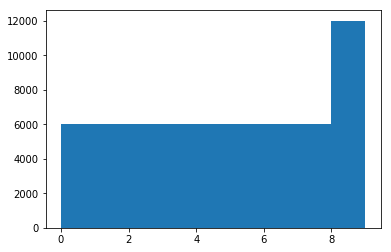

In [9]:
plt.hist(y_train, bins=np.arange(y_train.min(), y_train.max()+1))

In [10]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [11]:
# practice reshape
#temp = X_train.reshape((60000, 784))
#print(temp.shape)

In [12]:
#from sklearn.datasets import fetch_mldata

#mnist = fetch_mldata('MNIST original')
#mnist = fetch_mldata('Fashion-MNIST')

#from sklearn.datasets import fetch_openml
#mnist = fetch_mldata('Fashion-MNIST')

In [13]:
#from sklearn.model_selection import train_test_split

#train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [14]:
train_img = X_train
train_lbl = y_train

test_img = X_test
test_lbl = y_test

In [15]:
train_img = X_train.reshape((60000, 784))
train_lbl = y_train

test_img = X_test.reshape((10000, 784))
test_lbl = y_test

#temp = X_train.reshape((60000, 784))

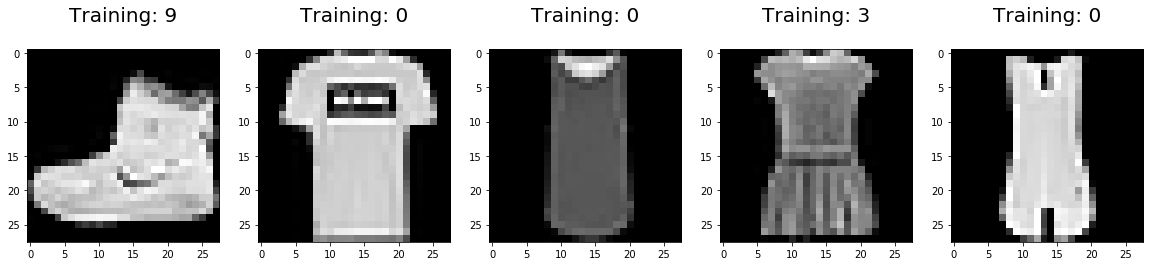

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [19]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([9], dtype=uint8)

In [21]:
logisticRegr.predict(test_img[0:10])

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [22]:
predictions = logisticRegr.predict(test_img)

In [23]:
type(predictions[0])

numpy.uint8

In [24]:
predictions = predictions.astype(int)

In [25]:
type(predictions[0])

numpy.int64

In [26]:
print(len(predictions))

10000


In [27]:
type(test_lbl[0])

numpy.uint8

In [28]:
test_lbl = test_lbl.astype(int)

In [29]:
print(type(test_lbl[0]))
print(len(test_lbl))

<class 'numpy.int64'>
10000


# Score

In [30]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.838


In [31]:
run_time = time.time() - t0
print('Example run in             : %.3f s' % run_time)

Example run in             : 78.881 s


## Display Misclassified images with Predicted Labels (Fashion MNIST)

In [32]:
import numpy as np 
import matplotlib.pyplot as plt

index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

In [33]:
print(len(misclassifiedIndexes))
print(misclassifiedIndexes[0:5])

1620
[12, 17, 25, 27, 40]


In [34]:
labels = {0 : "T-shirt/top", 
          1 : "Trouser", 
          2 : "Pullover", 
          3 : "Dress",
          4 : "Coat",
          5 : "Sandal",
          6 : "Shirt",
          7 : "Sneaker",
          8 : "Bag",
          9 : "Ankle boot"} 

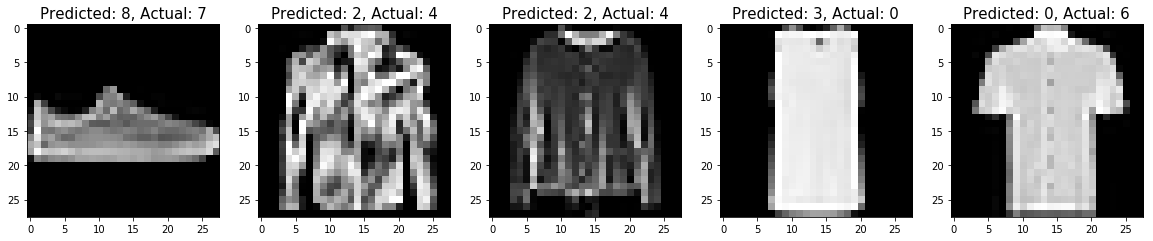

In [35]:
plt.figure(figsize=(20,4))

for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [ ]:
# https://github.com/zalandoresearch/fashion-mnist
    
# # fix labels later
# plt.figure(figsize=(20,4))

# temp1 = predictions[badIndex]
# temp2 = test_lbl[badIndex]

# for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
#  plt.subplot(1, 5, plotIndex + 1)
#  plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
#  plt.title("Predicted: {},  Actual: {}"
#            .format(labels[temp1], labels[temp2], 
#            fontsize = 15))
